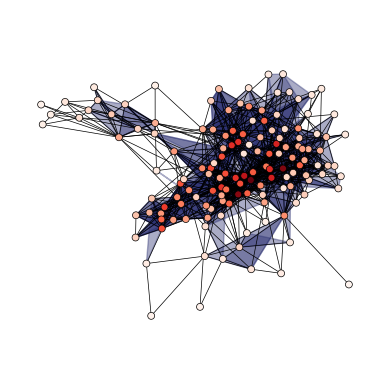

In [41]:

import xgi
import matplotlib.pyplot as plt
import numpy as np
import json
def get_position(fname, H):
    try:
        with open(fname, "r") as file:
            pos_stored = json.loads(file.read())
        pos = {i: np.array(p) for i, p in pos_stored.items()}
    except:
        pos = xgi.pairwise_spring_layout(H, seed=1)
        pos = xgi.pca_transform(pos)
        pos_store = {i: p.tolist() for i, p in pos.items()}
        datastring = json.dumps(pos_store)

        with open(fname, "w") as output_file:
            output_file.write(datastring)

    return pos

def get_hypergraph(fname, epsilon):
    try:
        H = xgi.read_json(fname)
    except:
        H = xgi.load_xgi_data("email-enron", max_order=2)
        H.cleanup()
        xgi.write_json(H, fname)
    return H

H = get_hypergraph("data.json", 0)
pos = get_position("pos.json", H)
plt.figure(figsize=(4, 4))
xgi.draw(H, pos, node_size=5, node_lw=0.5, dyad_lw=0.5, node_fc=H.nodes.degree)
plt.tight_layout()
plt.savefig("../assets/images/visualization.svg", dpi=1000)